In [1]:
import os
from PIL import Image
import cv2
import numpy as np

In [2]:
images = []
labels = []

label = 0
for classes in os.listdir('Data/'):
    class_folder = os.path.join('Data',classes)
    print('Adding images in ',classes)
    #print(class_folder)
    img_ct = 0
    for image_name in os.listdir(class_folder):
        img_name = os.path.join(class_folder,image_name)
        img = cv2.imread(img_name)
        #resize
        img = cv2.resize(img,(128,128))
        #normalize
        img = img/255.0
        images.append(img)
        labels.append(label)
        img_ct+=1
    print('\t',img_ct,' images')
    label=label+1

Adding images in  lightning
	 377  images
Adding images in  rain
	 526  images
Adding images in  snow
	 620  images
Adding images in  sunny
	 732  images


In [3]:
from keras.utils.np_utils import to_categorical

X = np.array(images)
Y = to_categorical(labels, 4)
X = X.reshape(-1, 128, 128, 3)

In [4]:
Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=.2, random_state=0, stratify=Y
)

In [6]:
print(len(y_train))

1804


In [7]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [8]:
X_train

array([[[[0.78039216, 0.82745098, 0.78431373],
         [0.80392157, 0.78823529, 0.77647059],
         [0.80392157, 0.77647059, 0.78039216],
         ...,
         [0.06666667, 0.20784314, 0.18431373],
         [0.08235294, 0.22352941, 0.2       ],
         [0.08235294, 0.22352941, 0.20392157]],

        [[0.68627451, 0.74509804, 0.70196078],
         [0.83529412, 0.81960784, 0.80784314],
         [0.84313725, 0.81176471, 0.81568627],
         ...,
         [0.08235294, 0.22352941, 0.2       ],
         [0.10980392, 0.25098039, 0.22745098],
         [0.08627451, 0.22745098, 0.20392157]],

        [[0.39215686, 0.4745098 , 0.42745098],
         [0.85490196, 0.85098039, 0.83529412],
         [0.82352941, 0.78823529, 0.79607843],
         ...,
         [0.15294118, 0.29411765, 0.27058824],
         [0.10588235, 0.24705882, 0.22352941],
         [0.08235294, 0.22352941, 0.2       ]],

        ...,

        [[0.69019608, 0.70980392, 0.67843137],
         [0.64705882, 0.6627451 , 0.63137255]

In [9]:
X_val.shape

(451, 128, 128, 3)

In [10]:
num_classes = 4

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(1,1),input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
def scheduler(epoch):
    lr = 0.0001
    if epoch < 10:
      return lr
    else:
      return lr * (0.9)

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard

opt = Adam(learning_rate=1e-5)

learning_rs = LearningRateScheduler(scheduler)
callbacks_all = [learning_rs]

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 100)               2

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, verbose=2, batch_size=32,callbacks = callbacks_all)

Epoch 1/20
57/57 - 29s - loss: 1.2776 - accuracy: 0.3930 - val_loss: 1.0562 - val_accuracy: 0.6142 - lr: 1.0000e-04 - 29s/epoch - 504ms/step
Epoch 2/20
57/57 - 19s - loss: 0.9660 - accuracy: 0.5715 - val_loss: 0.7806 - val_accuracy: 0.6608 - lr: 1.0000e-04 - 19s/epoch - 335ms/step
Epoch 3/20
57/57 - 19s - loss: 0.8090 - accuracy: 0.6879 - val_loss: 0.7699 - val_accuracy: 0.7073 - lr: 1.0000e-04 - 19s/epoch - 330ms/step
Epoch 4/20
57/57 - 19s - loss: 0.7180 - accuracy: 0.7312 - val_loss: 0.6406 - val_accuracy: 0.7627 - lr: 1.0000e-04 - 19s/epoch - 336ms/step
Epoch 5/20
57/57 - 19s - loss: 0.6528 - accuracy: 0.7616 - val_loss: 0.6445 - val_accuracy: 0.7738 - lr: 1.0000e-04 - 19s/epoch - 337ms/step
Epoch 6/20
57/57 - 18s - loss: 0.5810 - accuracy: 0.7921 - val_loss: 0.5961 - val_accuracy: 0.8004 - lr: 1.0000e-04 - 18s/epoch - 318ms/step
Epoch 7/20
57/57 - 18s - loss: 0.5356 - accuracy: 0.8054 - val_loss: 0.5890 - val_accuracy: 0.7938 - lr: 1.0000e-04 - 18s/epoch - 323ms/step
Epoch 8/20
57

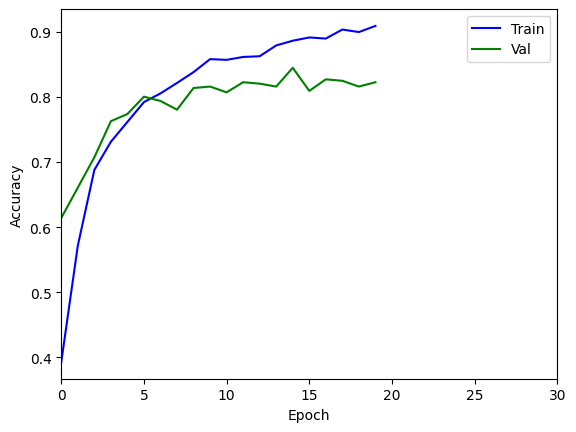

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['accuracy'], color='blue', label='Train')
plt.plot(history.epoch, history.history['val_accuracy'],color='green', label='Val')
plt.xlabel('Epoch')
plt.xlim([0,30])
plt.ylabel('Accuracy')
plt.legend()

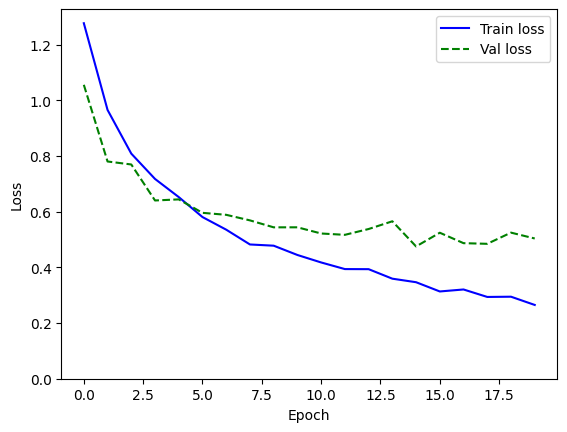

In [19]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_loss(history, label, n):
    # Use a log scale on y-axis to show the wide range of values.
    plt.plot(history.epoch, history.history['loss'],
               color='blue', label='Train ' + label)
    plt.plot(history.epoch, history.history['val_loss'],color='green', label='Val ' + label,linestyle="--")
    plt.ylim([0, plt.ylim()[1]])         
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plot_loss(history, 'loss', 0)

In [20]:
test = []
labels = []

label = 0
for classes in os.listdir('Test_Data/'):
    class_folder = os.path.join('Test_Data',classes)
    print('Adding images in ',classes)
    #print(class_folder)
    img_ct = 0
    for image_name in os.listdir(class_folder):
        img_name = os.path.join(class_folder,image_name)
        img = cv2.imread(img_name)
        #resize
        #print(img_name)
        img = cv2.resize(img,(128,128))
        #normalize
        img = img/255.0
        test.append(img)
        labels.append(int(classes))
        img_ct+=1
    print('\t',img_ct,' images')
    label=label+1

Adding images in  0
	 377  images
Adding images in  1
	 214  images
Adding images in  2
	 1000  images
Adding images in  3
	 1000  images


In [21]:
X_test = np.array(test)
Y_test = to_categorical(labels, 4)
X_test = X_test.reshape(-1, 128, 128, 3)

In [22]:
X_test.shape

(2591, 128, 128, 3)

In [23]:
Y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [24]:
Y_pred = model.predict(X_test)


81/81 [==============================] - 6s 70ms/step


In [25]:
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [26]:
Y_pred_classes

array([0, 0, 0, ..., 2, 3, 3], dtype=int64)

In [27]:
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 

In [28]:
Y_true

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [29]:
import itertools
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

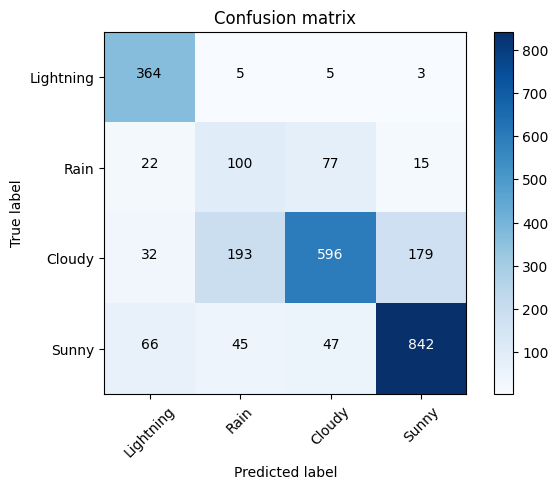

In [30]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = ['Lightning','Rain','Cloudy','Sunny'])

In [31]:
test_acc = (364+100+596+842)*100/len(X_test)

In [32]:
test_acc

73.40795059822463